In [99]:
"""
DESCRIPTION OF IMPLEMENTATION:

For this problem we solve the logistic regression problem which deals with classifying elements into a specific category.  To do this we take advantage of the sigmoid function, 
which has the characteristic of converting a number into a probability.  The loss function for logistic regression is given in the homework, as well as the gradient for the loss function 
that we generalize in this algorithm from when we calculated the partial derivatives with respect to a weight for individual features and labels.  Using these equations we train the model by first 
initializing the weight vector with random values, then compute a guess by taking the sigmoid function of our weight vector multiplied by our training set. Next we compute the gradient 
by using the previously computed probability guesses, the y training labels and the equation mentioned for the gradient.  Lastly we compute the next set of weights by subtracting our learning rate 
multiplied by the gradient from our last set of weights.  We do this over 50,000 iterations to allow the algorithm to find a minimum location.  Error rates are calculated for each of the folds.  

I include the equations used in the LateX doc towards the end
"""

'\nDESCRIPTION OF IMPLEMENTATION:\n\nFor this problem we solve the logistic regression problem which deals with classifying elements into a specific category.  To do this we take advantage of the sigmoid function, \nwhich has the characteristic of converting a number into a probability.  The loss function for logistic regression is given in the homework, as well as the gradient for the loss function \nthat we generalize in this algorithm from when we calculated the partial derivatives with respect to a weight for individual features and labels.  Using these equations we train the model by first \ninitializing the weight vector with random values, then compute a guess by taking the sigmoid function of our weight vector multiplied by our training set. Next we compute the gradient \nby using the previously computed probability guesses, the y training labels and the equation mentioned for the gradient.  Lastly we compute the next set of weights by subtracting our learning rate \nmultiplied

In [0]:
# Used to upload the Housing.csv file
from google.colab import files
uploaded = files.upload()

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def get_next_train_valid(X_shuffled, y_shuffled, itr):
    """
    Return one validation set and concatenate the rest to 
    use as a training set
    """
    val_x, val_y = X_shuffled[itr], y_shuffled[itr][:,None]
    
    training_x = np.empty((0,X_shuffled[0].shape[1]))
    training_y = np.empty((0,1))
    
    for k,v in X_shuffled.items():
      if k != itr:
        training_x = np.concatenate((training_x,v),axis=0)
    
    for k,v in y_shuffled.items():
      if k != itr:
        training_y = np.concatenate((training_y,v.reshape(v.shape[0],1)),axis=0)
        
        
    return training_x, training_y, val_x, val_y

In [0]:
# Function used in our loss equation
def sigmoid(a):
  return 1 / (1 + np.exp(-a))

def train(X_train, y_train):
    """
    Training the model with gradient descent 
    """
    # learning rate chosen from hyperparameter testing
    lr = .01
    iterations = 50000
    
    # Initialize weight vector randomly
    theta = np.random.random_sample((X_train.shape[1],1))

    for i in range(iterations):
      # Make guess
      a = np.dot(X_train, theta)  

      # Change to propabilities
      prob = sigmoid(a)

      # Find new direction to travel using gradient equation
      grad = np.dot(X_train.T, (prob - y_train)) / y_train.size

      # Compute next theta vector
      theta = theta - lr * grad
       
    
    return theta # the model

In [0]:
def predict(X_valid, model):
    """
    prediction function that uses sigmoid to convert numbers to
    probabilities.  Thresholded to give a discrete class for the 
    prediction
    """
    # Threshold chosen so if value is above %50
    # we consider it a 1
    thresh = 0.5
    pred = sigmoid(np.dot(X_valid,model))
    
    return (pred >= thresh).astype(int)

In [0]:
data_feat = pd.read_csv('IRISFeat.csv',header=None,names=['Sepal Length','Sepal Width'])
data_label = pd.read_csv('IRISlabel.csv',header=None,names=['Species'])

# Convert to numpy matrix [X:y] were X is features matrix and y is label vector
data_feat = data_feat.values
data_label = data_label.values

data_comb = np.concatenate((data_feat,data_label),axis=1)

# Shuffle entries
np.random.shuffle(data_comb)

In [179]:
"""
Overall logic.
"""
k = 5

X_shuffled = dict([(i,feat) for i,feat in enumerate(np.array_split(data_comb[:,:-1],k))])
y_shuffled = dict([(i,feat) for i,feat in enumerate(np.array_split(data_comb[:,-1],k))])

# Loop through the folds
error_rates = []
for i in range(0,k):
  
  # Get training and validation sets
  x_train, y_train, x_test, y_test = get_next_train_valid(X_shuffled, y_shuffled, i)
  
  # Train to get the model for prediction
  model = train(x_train, y_train)
  
  # Predict y values
  y_predictions = predict(x_test, model)

  # Computer error rates over the set of predictions
  errors = 0
  
  # Calculate errors over the predictions
  errors = np.not_equal(y_predictions,y_test).astype(int).sum()
   
  # Store the average error rate for the fold
  err_rate = errors / y_test.shape[0]
  error_rates.append(err_rate)

avg_error = sum(error_rates) / len(error_rates)
print("Average error rate across folds: {}".format(avg_error))

Average error rate across folds: 0.006666666666666666


In [0]:
'''
Data to help with visualization 
'''
   lr  | Avg err

.00001 = 0.3333
.001   = .0066
.01    = .0066
.1     = .0133
1      = .0133
10     = .02

In [180]:
error_rates

[0.0, 0.0, 0.0, 0.0, 0.03333333333333333]

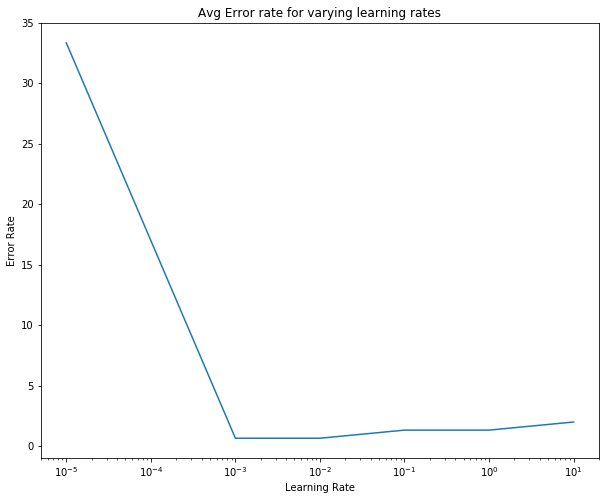

In [181]:
x = [.00001,.001,.01,.1,1,10]
y = [33.33, .66, .66, 1.33, 1.33,2]

plt.figure(figsize=(10,8))
plt.semilogx(x,y)
plt.title("Avg Error rate for varying learning rates")
plt.xlabel("Learning Rate")
plt.ylabel("Error Rate")
plt.show()